Project: Hospital Bookings


Table of content
1. Introduction
2. Data wrangling
3. Exploratory data analysis
4. conclusions
5. Limitations

The following dataset provides information on booked appointments as well as those appointment that had absentees. I'm attempting to isolate the reason for abscences. If i can find a clear answer or a common mitigating factor based on the information provided here.
The questions I'll be focusing on for this project are:
1. How influential is gender on appointment attendance.
2. Does an sms-notification increase chances of attendance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


The table above displays the columns in the data provided. We have 14 columns in this dataframe.
1. PatientId : a unique numeric for identifying each patient
2. AppointmentId : a unique Id for each booked appointment (both for those attended and otherwise)
3. Gender: The patients sex
4. ScheduledDay : when the appointment was made
5. AppointmentDay : the said appointment
6. Age: the patients age
7. Neighbourhood: location of the medical facility
8. scholarship:Government funded treatment(1 is yes, 0 is no)
9. Hypertension
10. Diabetes
11. Alcoholism
12. Handicap
13. sms received: If the patient received an sms reminder
14. No-show: If the patient attended the appointment

In [3]:
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The data has no null values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataframe has 110527 entries, 8 of the columns are in an integer format, 1 is in a float and the last 5 are in a string format.

In [5]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

Cross checking the unique values provided. Appointment day and Neighbourhood are quite low for this amount of entries so i'll take a second look later to try and see what happend.

In [6]:
df.rename(columns = {"PatientId":"patient_id","ScheduledDay":"scheduled_day","AppointmentDay":"appointment_day",
           "Hipertension":"hypertension","Handcap":"handicap","No-show":"no_show"},inplace = True)
df.head(0)

,patient_id,AppointmentID,Gender,scheduled_day,appointment_day,Age,Neighbourhood,Scholarship,hypertension,Diabetes,Alcoholism,handicap,SMS_received,no_show


In [7]:
df.columns = df.columns.str.lower()
df.head(0)

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show


I renamed and formatted the column name to make it more conducive for later data manipulation

In [8]:
df.describe()

,patient_id,appointmentid,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Taking a look at some statistical information about the data.The mean for the age of patients is 37 years old, but it also shows a minimum age of -1 which should be an error.

In [9]:
df_age = df.query('age < 0')
df_age

,patient_id,appointmentid,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


This is the errant entry in the age column.

In [10]:
df.drop([99832], axis = 0, inplace = True)
df.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

I discarded the age entry of -1 to avoid the outlier/mistake affecting the data

In [11]:
df.drop(['appointmentid'],axis = 1, inplace = True)
df.columns

Index(['patient_id', 'gender', 'scheduled_day', 'appointment_day', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

In [12]:
df['patient_id'] = df['patient_id'].astype('str')
df['patient_id'].dtype

dtype('O')

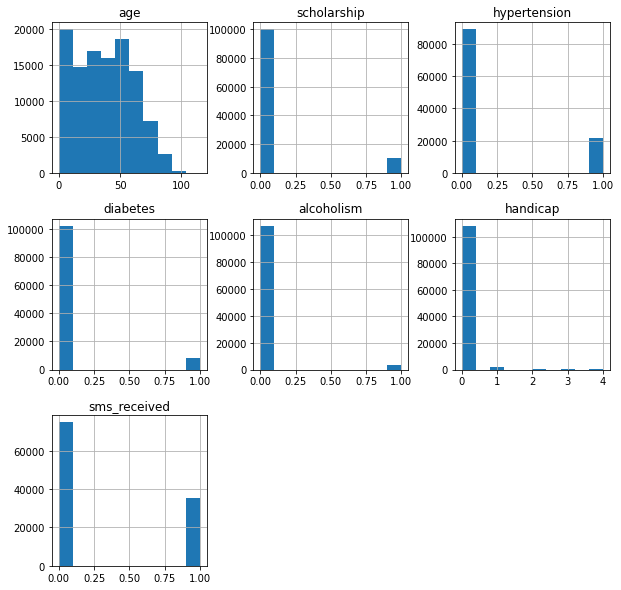

In [13]:
df.hist(figsize = (10, 10));

In [14]:
df['handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: handicap, dtype: int64

In [15]:
df['handicap'].replace([2,3,4],np.nan,inplace=True)
df['handicap'].value_counts()

0.0    108285
1.0      2042
Name: handicap, dtype: int64

In [16]:
df['no_show'] = [1 if x == 'Yes' else 0 for x in df['no_show']]
df['no_show']

0         0
1         0
2         0
3         0
4         0
         ..
110522    0
110523    0
110524    0
110525    0
110526    0
Name: no_show, Length: 110526, dtype: int64

In [17]:
df.patient_id.value_counts().head()

822145925426128.0    88
99637671331.0        84
26886125921145.0     70
33534783483176.0     65
6264198675331.0      62
Name: patient_id, dtype: int64

In [18]:
df.drop_duplicates('patient_id',inplace=True)

In [19]:
df.patient_id.value_counts().head()

29872499824296.0    1
287795738325.0      1
62147718285887.0    1
5262882256853.0     1
4765194286359.0     1
Name: patient_id, dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62298 entries, 0 to 110524
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   patient_id       62298 non-null  object 
 1   gender           62298 non-null  object 
 2   scheduled_day    62298 non-null  object 
 3   appointment_day  62298 non-null  object 
 4   age              62298 non-null  int64  
 5   neighbourhood    62298 non-null  object 
 6   scholarship      62298 non-null  int64  
 7   hypertension     62298 non-null  int64  
 8   diabetes         62298 non-null  int64  
 9   alcoholism       62298 non-null  int64  
 10  handicap         62190 non-null  float64
 11  sms_received     62298 non-null  int64  
 12  no_show          62298 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 6.7+ MB


In [21]:
df.gender.value_counts()

F    40045
M    22253
Name: gender, dtype: int64

<AxesSubplot:ylabel='gender'>

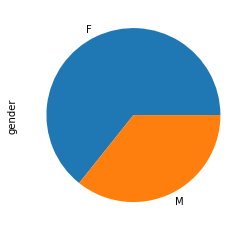

In [22]:
df.gender.value_counts().plot(kind="pie")

In [23]:
df['no_show'].value_counts()

0    50105
1    12193
Name: no_show, dtype: int64

<AxesSubplot:ylabel='no_show'>

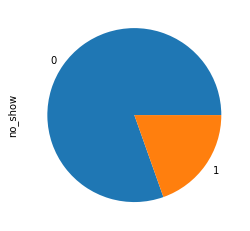

In [24]:
df['no_show'].value_counts().plot(kind="pie")

In [25]:
df['age'].value_counts()

0      2073
1      1443
2      1074
3       966
5       919
       ... 
98        4
100       3
102       2
115       2
99        1
Name: age, Length: 103, dtype: int64

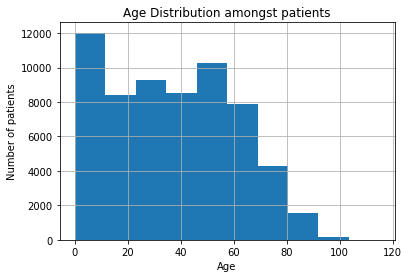

In [26]:
df['age'].hist(bins=10)
plt.xlabel('Age')
plt.ylabel('Number of patients')
plt.title('Age Distribution amongst patients')
plt.show();

In [27]:
df.scholarship.value_counts()

0    56510
1     5788
Name: scholarship, dtype: int64

In [28]:
df.handicap.value_counts()

0.0    61165
1.0     1025
Name: handicap, dtype: int64

In [29]:
df.hypertension.value_counts()

0    50056
1    12242
Name: hypertension, dtype: int64

In [30]:
df.alcoholism.value_counts()

0    60792
1     1506
Name: alcoholism, dtype: int64

In [31]:
df.sms_received.value_counts()

0    41904
1    20394
Name: sms_received, dtype: int64

****Questions

The first question that came to mind while looking over the column information was if gender had any significant effect on keeping appointments in this data. So my first question is to explore that here.

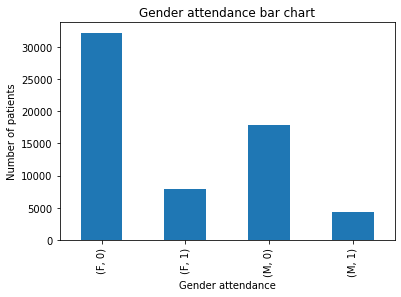

In [32]:
df.groupby(['gender'])['no_show'].value_counts().plot(kind="bar")
plt.xlabel('Gender attendance')
plt.ylabel('Number of patients')
plt.title('Gender attendance bar chart')
plt.show();

Although the females are quite alot more than males in this data, their proportion of attendance is more or less similar

In [33]:
df.groupby(['gender','scholarship'])['no_show'].value_counts()


gender  scholarship  no_show
F       0            0          28582
                     1           6762
        1            0           3635
                     1           1066
M       0            0          17042
                     1           4124
        1            0            846
                     1            241
Name: no_show, dtype: int64

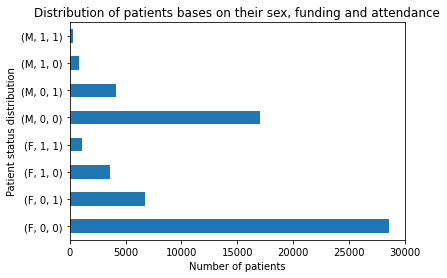

In [34]:
df.groupby(['gender','scholarship'])['no_show'].value_counts().plot(kind='barh')
plt.xlabel('Number of patients')
plt.ylabel('Patient status distribution')
plt.title('Distribution of patients bases on their sex, funding and attendance')
plt.show();

still on gender, i'd like to see the effects of extenuating circumstances like health problems etc on each gender.

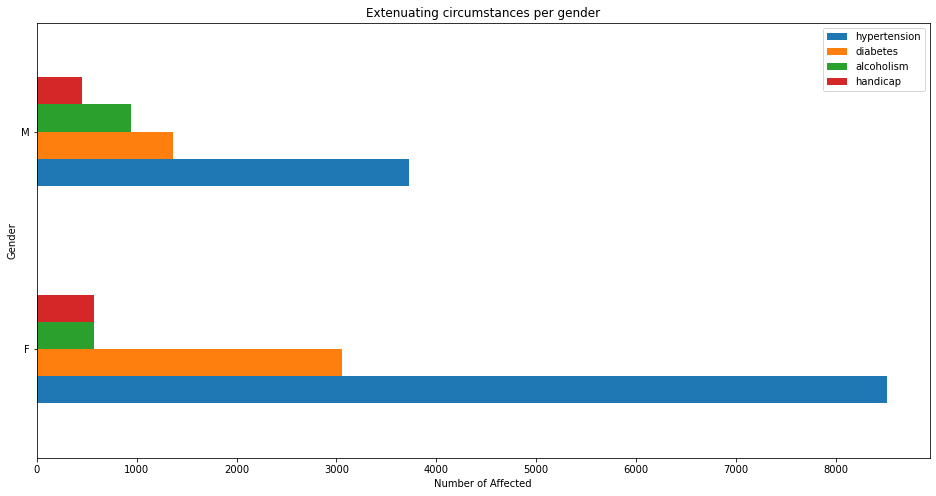

In [35]:
df[['gender','hypertension', 'diabetes', 'alcoholism', 'handicap']].groupby(['gender']).sum().plot(kind='barh',figsize=(16,8))
plt.xlabel('Number of Affected')
plt.ylabel('Gender')
plt.title("Extenuating circumstances per gender")
plt.show();


Q2.  Effects of Sms sent on attendance.

<AxesSubplot:ylabel='sms_received'>

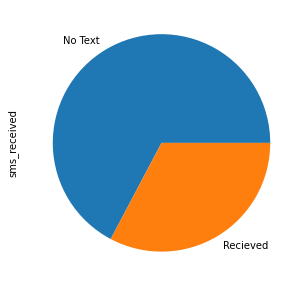

In [36]:
df.sms_received.value_counts().plot(kind='pie',labels= ['No Text','Recieved'],figsize=(5,5))

In [37]:
df.groupby('sms_received')['no_show'].value_counts()

sms_received  no_show
0             0          35202
              1           6702
1             0          14903
              1           5491
Name: no_show, dtype: int64

<AxesSubplot:ylabel='sms_received,no_show'>

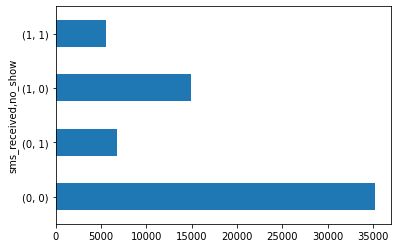

In [38]:
df.groupby('sms_received')['no_show'].value_counts().plot(kind="barh")

Those that received an sms did have a higher number attending appointments but those who did not receive at all had the same effect if not better.

CONCLUSION

q1. There is no significant shift in the data to show that gender plays a basis in attendance or not.
q2. The sms notifications did not have much in terms of visible effects in response. I think it would do better with more data

LIMITATIONS

We had a wrong entry in the age data which should be an error. 
The handicap values where meant to be 0&1 but we had added values of 2,3 & 4.


In [39]:
#from subprocess import call
#call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])
